# Promoting SDG 3 through Social Media: A Sentiment Analysis Approach to HIV and AIDS Awareness on Twitter

The study collected Twitter data on #SDG3, #HIVawareness, #AIDSawareness, #healthpromotion, #publichealth, #healthcommunication, #healtheducation, and #preventivehealth to analyze public perceptions on health promotion.

In [7]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

df = pd.read_csv("data_pre_processing.csv")
df.sample(5)

,raw_sentence,clean_text,textblob_polarity,sentiment_textblob
257,RT @LeedsCCP: Academics from the Centre for Health Promotion Research at #LeedsBeckett have a chapter in the Global Handbook of Health Promâ€¦,#LeedsBeckett Prom Research Centre chapter Handbook Health Promotion Academics Global,0.00,Neutral
3366,"RT @WellnessParadox: â€œExercise is medicineâ€“the two do go togetherâ€ - Dr. Kenneth Cooper, Episode 89: A Lifetime of Addressing The Paradoxâ€¦",medicine Exercise Episode Paradox Cooper together Addressing Kenneth Lifetime,0.00,Neutral
2591,RT @hastingscenter: What is bioethics? Who benefits from bioethics? Who practices bioethics? Who goes into bioethics? Why? These and many oâ€¦,benefit These What go practice many bioethics,0.50,Positive
2554,"New post live #OnTheBlog ""Know Better, Do Better"" by Ana M. NegrÃ³n. Read here https://t.co/tcPRiuvoH6 \n \n#PA #Pennsylvania #PSRPA #Blog #PublicHealth #Penn #PACantWait https://t.co/zMKB2TcObq",#Blog #Pennsylvania #PACantWait #PSRPA Read #Penn Negr #PublicHealth Better #OnTheBlog live post Know,0.32,Partially Positive
4487,FAMA promotes #smartworking to achieve the Sustainable Development goals of #agenda2030.\n\n#SDG3 #SDG13 #SDG5 #SDG8 #SDG10 https://t.co/a4smkc2sq9,achieve Development #agenda2030 #SDG3 Sustainable #smartworking FAMA goal promotes #SDG13 #SDG5 #SDG8 #SDG10,0.00,Neutral


Data Summary

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8374 entries, 0 to 8373
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   raw_sentence        8128 non-null   object 
 1   clean_text          8099 non-null   object 
 2   textblob_polarity   8374 non-null   float64
 3   sentiment_textblob  8374 non-null   object 
dtypes: float64(1), object(3)
memory usage: 261.8+ KB


Number of character

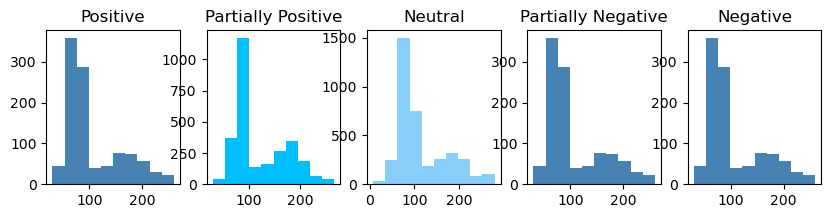

In [23]:
import matplotlib.pyplot as plt

fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5, figsize=(10,2))

dfca_len=df[df['sentiment_textblob']=='Positive']['clean_text'].str.len()
ax1.hist(dfca_len,color='steelblue')
ax1.set_title('Positive')

dfcb_len=df[df['sentiment_textblob']=='Partially Positive']['clean_text'].str.len()
ax2.hist(dfcb_len,color='deepskyblue')
ax2.set_title('Partially Positive')

dfcc_len=df[df['sentiment_textblob']=='Neutral']['clean_text'].str.len()
ax3.hist(dfcc_len,color='lightskyblue')
ax3.set_title('Neutral')

dfcd_len=df[df['sentiment_textblob']=='Partially Negative']['clean_text'].str.len()
ax4.hist(dfca_len,color='steelblue')
ax4.set_title('Partially Negative')

dfcd_len=df[df['sentiment_textblob']=='Negative']['clean_text'].str.len()
ax5.hist(dfca_len,color='steelblue')
ax5.set_title('Negative')

# fig.suptitle('Characters in sentences')
plt.show()

Text(0.5, 1.0, 'Negative')

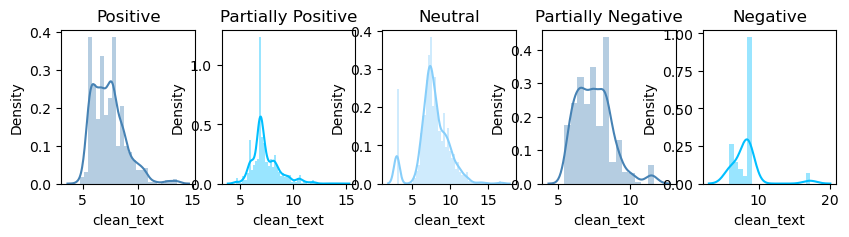

In [42]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np

fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5, figsize=(10,2))

wordaa=df[df['sentiment_textblob']=='Positive']['clean_text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(wordaa.map(lambda x: np.mean(x)),ax=ax1,color='steelblue')
ax1.set_title('Positive')

wordab=df[df['sentiment_textblob']=='Partially Positive']['clean_text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(wordab.map(lambda x: np.mean(x)),ax=ax2,color='deepskyblue')
ax2.set_title('Partially Positive')

wordac=df[df['sentiment_textblob']=='Neutral']['clean_text'].apply(str).str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(wordac.map(lambda x: np.mean(x)),ax=ax3,color='lightskyblue')
ax3.set_title('Neutral')

wordac=df[df['sentiment_textblob']=='Partially Negative']['clean_text'].apply(str).str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(wordac.map(lambda x: np.mean(x)),ax=ax4,color='steelblue')
ax4.set_title('Partially Negative')

wordac=df[df['sentiment_textblob']=='Negative']['clean_text'].apply(str).str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(wordac.map(lambda x: np.mean(x)),ax=ax5,color='deepskyblue')
ax5.set_title('Negative')

# fig.suptitle('Average word length in each sentence')

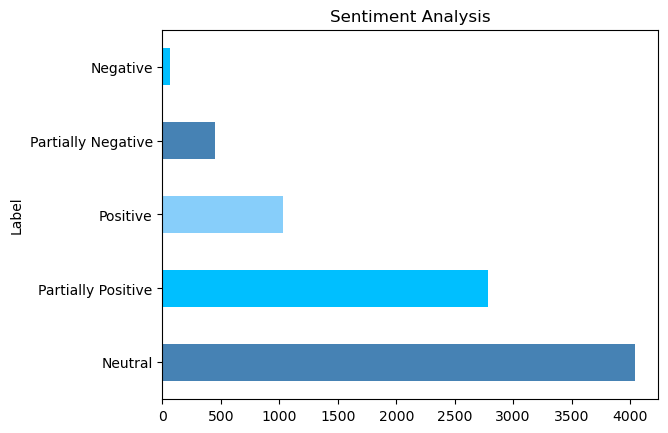

In [35]:
plt.title("Sentiment Analysis")

plt.ylabel("Label")
df["sentiment_textblob"].value_counts().plot(kind="barh", color=['steelblue', 'deepskyblue', 'lightskyblue'])
plt.show()

In [37]:
df["sentiment_textblob"].value_counts()

Neutral               4040
Partially Positive    2788
Positive              1032
Partially Negative     447
Negative                67
Name: sentiment_textblob, dtype: int64

In [39]:
df["sentiment_textblob"].value_counts(normalize=True).to_frame().style.format('{:.2%}')

,sentiment_textblob
Neutral,48.24%
Partially Positive,33.29%
Positive,12.32%
Partially Negative,5.34%
Negative,0.80%


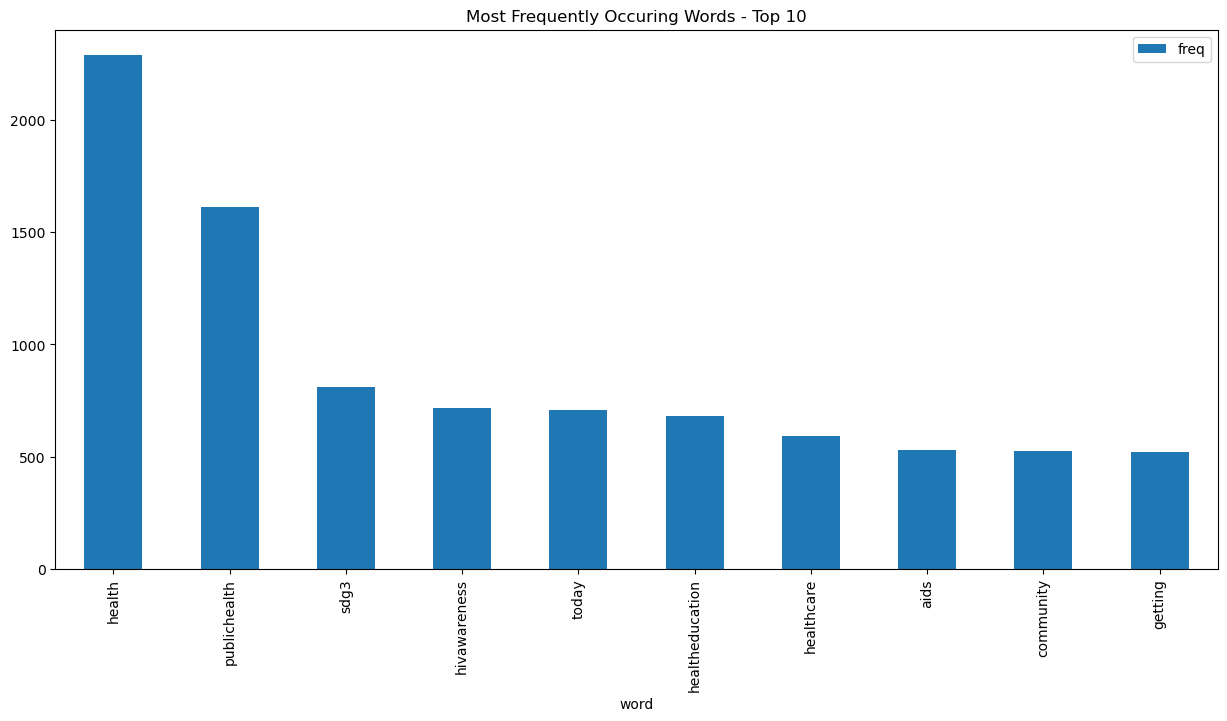

In [41]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
words = cv.fit_transform(df.clean_text.values.astype('U'))

sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(10).plot(x='word', y='freq', kind='bar', figsize=(15, 7))
plt.title("Most Frequently Occuring Words - Top 10")
plt.show()

Wordcloud Positive

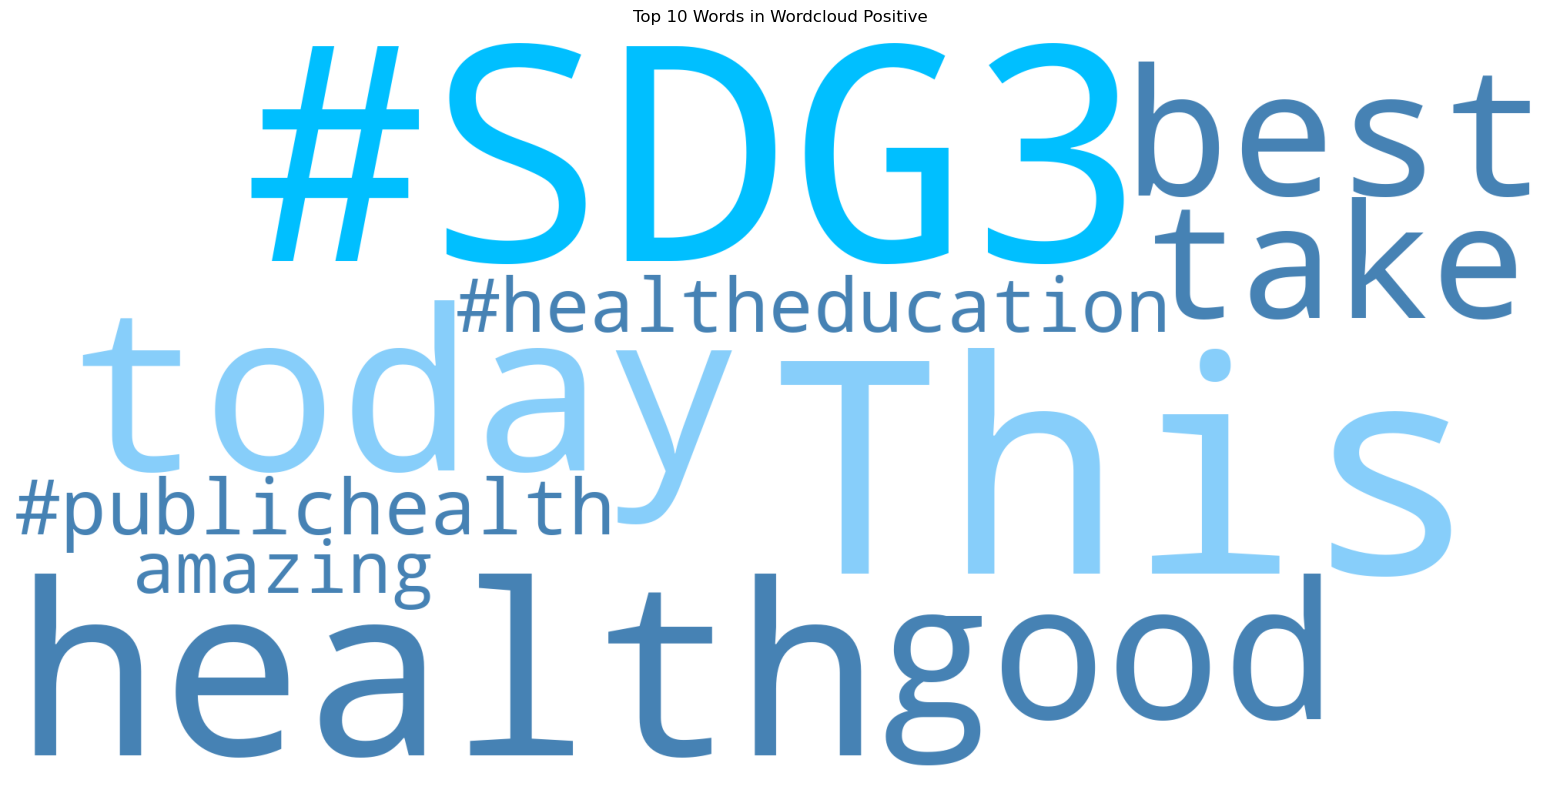

In [92]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import numpy as np

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#87CEFA", "#00BFFF", "#4682B4"]
    return np.random.choice(colors)

words = ' '.join([Text for Text in df[df['sentiment_textblob']=='Positive']['clean_text'].values.astype('U')])

# Get the frequency of each word
word_frequencies = {}
for word in words.split():
    word_frequencies[word] = word_frequencies.get(word, 0) + 1

# Get the top 10 words by frequency
top_words = dict(sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:10])

wordCloud = WordCloud(background_color='white', mode="RGB", width=2000, height=1000, color_func=color_func).generate_from_frequencies(top_words)

plt.figure(figsize=(20,10))
plt.imshow(wordCloud)
plt.title("Top 10 Words in Wordcloud Positive")
plt.axis("off")
plt.show()

Wordcloud Partially Positive

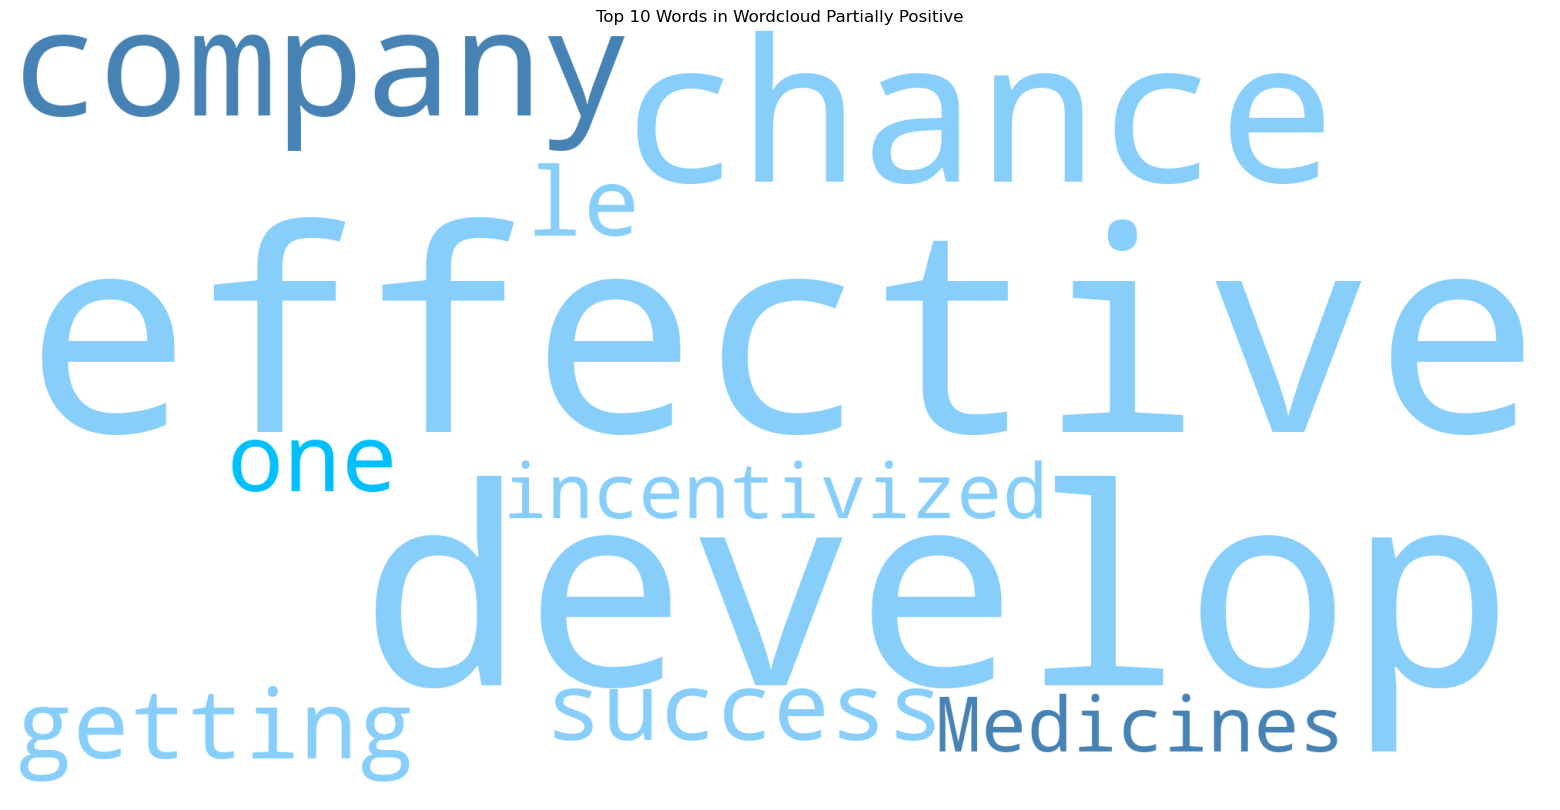

In [91]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import numpy as np

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#87CEFA", "#00BFFF", "#4682B4"]
    return np.random.choice(colors)

words = ' '.join([Text for Text in df[df['sentiment_textblob']=='Partially Positive']['clean_text'].values.astype('U')])

# Get the frequency of each word
word_frequencies = {}
for word in words.split():
    word_frequencies[word] = word_frequencies.get(word, 0) + 1

# Get the top 10 words by frequency
top_words = dict(sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:10])

wordCloud = WordCloud(background_color='white', mode="RGB", width=2000, height=1000, color_func=color_func).generate_from_frequencies(top_words)

plt.figure(figsize=(20,10))
plt.imshow(wordCloud)
plt.title("Top 10 Words in Wordcloud Partially Positive")
plt.axis("off")
plt.show()

In [81]:
words_df = pd.DataFrame(frequency)

In [83]:
%%time
from textblob import TextBlob
def get_sub(Tweets):
    return TextBlob(Tweets).sentiment.subjectivity
def get_pol(Tweets):
    return TextBlob(Tweets).sentiment.polarity

words_df['subjectivity'] = words_df['word'].apply(get_sub)
words_df['textblob_words'] = words_df['word'].apply(get_pol)
words_df[['word', 'subjectivity', 'textblob_words']].round(2).head(10)#.reset_index(drop=True)

Wall time: 931 ms


,word,subjectivity,textblob_words
0,health,0.0,0.0
1,publichealth,0.0,0.0
2,sdg3,0.0,0.0
3,hivawareness,0.0,0.0
4,today,0.0,0.0
5,healtheducation,0.0,0.0
6,healthcare,0.0,0.0
7,aids,0.0,0.0
8,community,0.0,0.0
9,getting,0.0,0.0


In [85]:
def tweet_analysis(score): 
    if score >= 0.5:
        return 'Positive'
    elif score >= 0.05 and score < 0.5:
        return 'Partially Positive'
    elif score > -0.05 and score < 0.05:
        return 'Neutral'
    elif score > -0.5 and score <= -0.05:
        return 'Partially Negative'
    else:
        return 'Negative'
words_df["textblob_word_label"] = words_df["textblob_words"].apply(tweet_analysis)
words_df[['word', 'textblob_word_label']].head(10)

,word,textblob_word_label
0,health,Neutral
1,publichealth,Neutral
2,sdg3,Neutral
3,hivawareness,Neutral
4,today,Neutral
5,healtheducation,Neutral
6,healthcare,Neutral
7,aids,Neutral
8,community,Neutral
9,getting,Neutral


<AxesSubplot:xlabel='textblob_word_label', ylabel='count'>

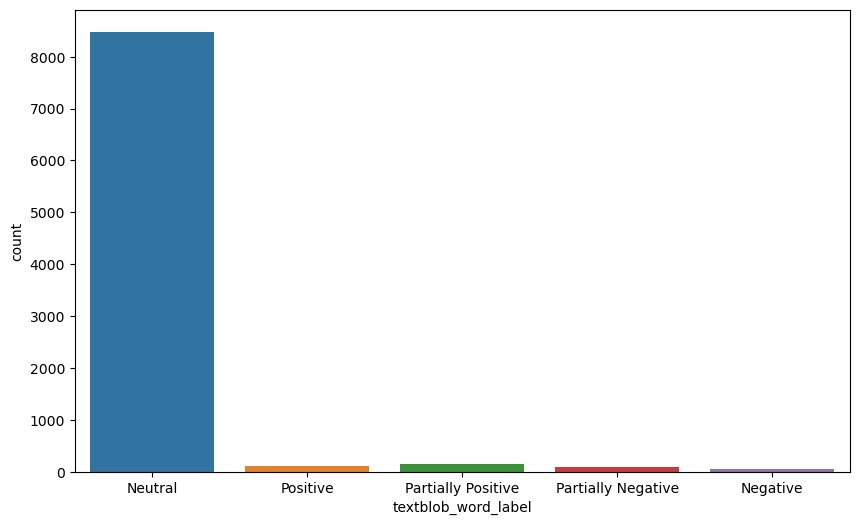

In [88]:


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(words_df.textblob_word_label)

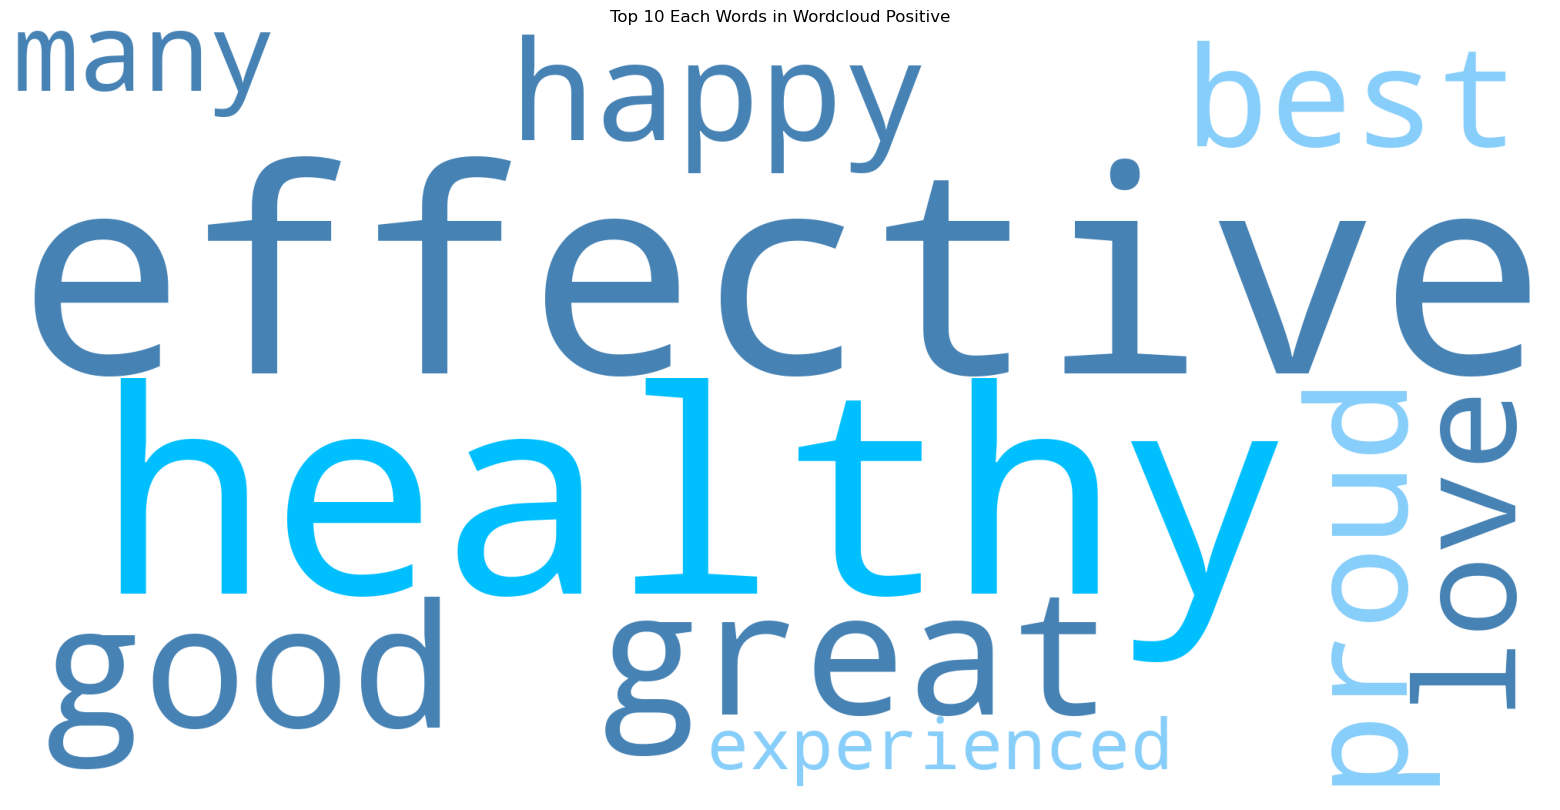

In [96]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import numpy as np

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#87CEFA", "#00BFFF", "#4682B4"]
    return np.random.choice(colors)

words = ' '.join([Text for Text in words_df[words_df['textblob_word_label']=='Positive']['word'].values.astype('U')])

# Get the frequency of each word
word_frequencies = {}
for word in words.split():
    word_frequencies[word] = word_frequencies.get(word, 0) + 1

# Get the top 10 words by frequency
top_words = dict(sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:10])

wordCloud = WordCloud(background_color='white', mode="RGB", width=2000, height=1000, color_func=color_func).generate_from_frequencies(top_words)

plt.figure(figsize=(20,10))
plt.imshow(wordCloud)
plt.title("Top 10 Each Words in Wordcloud Positive")
plt.axis("off")
plt.show()

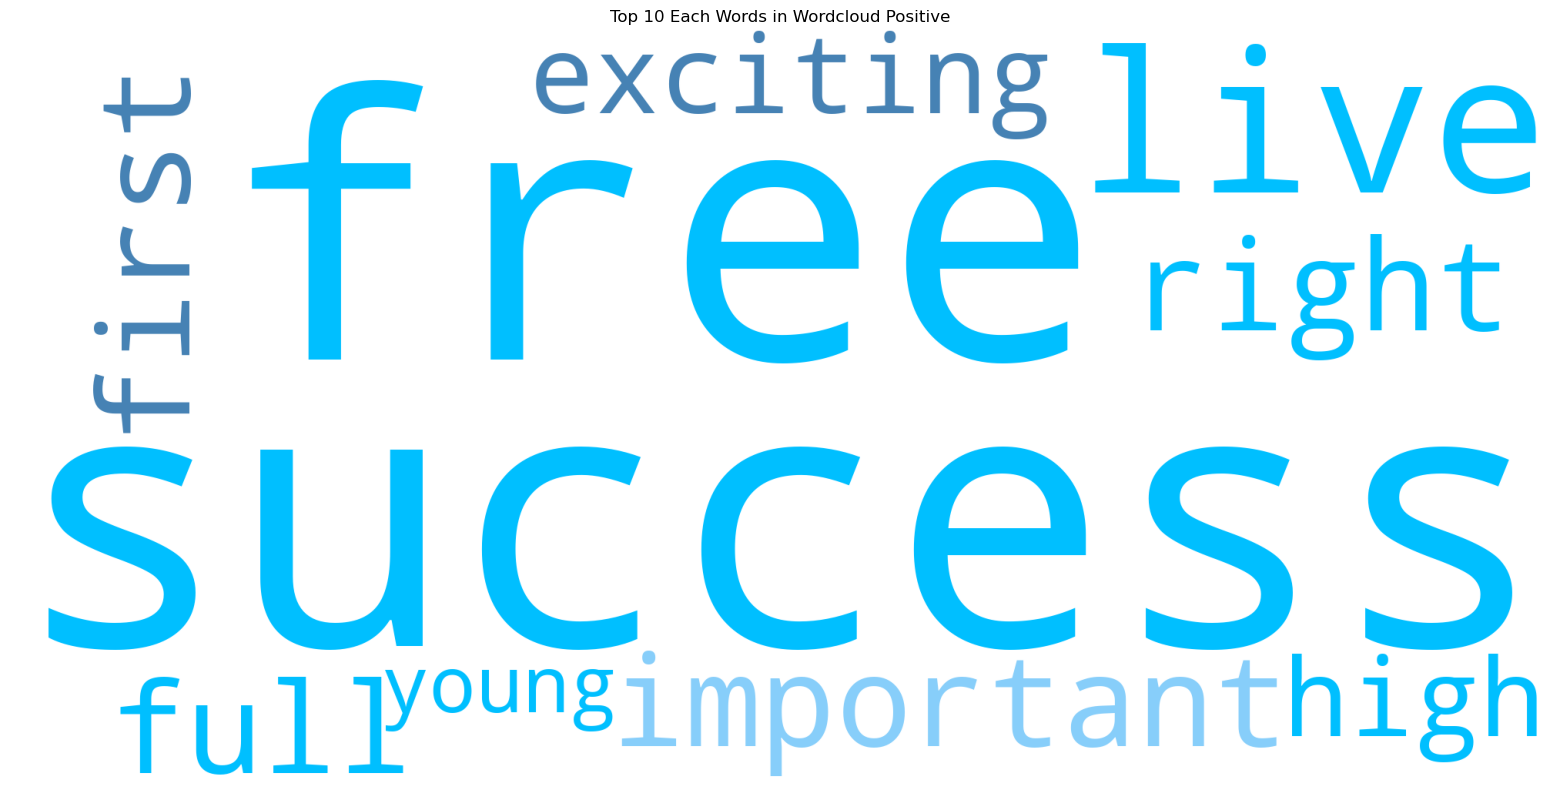

In [97]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import numpy as np

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#87CEFA", "#00BFFF", "#4682B4"]
    return np.random.choice(colors)

words = ' '.join([Text for Text in words_df[words_df['textblob_word_label']=='Partially Positive']['word'].values.astype('U')])

# Get the frequency of each word
word_frequencies = {}
for word in words.split():
    word_frequencies[word] = word_frequencies.get(word, 0) + 1

# Get the top 10 words by frequency
top_words = dict(sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:10])

wordCloud = WordCloud(background_color='white', mode="RGB", width=2000, height=1000, color_func=color_func).generate_from_frequencies(top_words)

plt.figure(figsize=(20,10))
plt.imshow(wordCloud)
plt.title("Top 10 Each Words in Wordcloud Positive")
plt.axis("off")
plt.show()

In [102]:
import pandas as pd
import re

# Assuming 'clean_text' is a column of mixed data types
df['clean_text'] = df['clean_text'].astype(str)

# Extract all hashtags from 'clean_text'
hashtags = []
for text in df['clean_text']:
    hashtags.extend(re.findall(r'\#\w+', text))

# Create a dictionary to store the frequency of each hashtag
hashtags_dict = {}
for tag in hashtags:
    if tag in hashtags_dict:
        hashtags_dict[tag] += 1
    else:
        hashtags_dict[tag] = 1

# Convert the dictionary to a Pandas DataFrame
hashtags_df = pd.DataFrame(list(hashtags_dict.items()), columns=['hashtag', 'frequency'])

# Sort the DataFrame by frequency in descending order
hashtags_df = hashtags_df.sort_values('frequency', ascending=False)

# Display the top 10 hashtags by frequency
hashtags_df.head(20)


,hashtag,frequency
178,#publichealth,979
1466,#SDG3,643
130,#PublicHealth,615
199,#healtheducation,513
69,#health,507
72,#healthcare,422
28,#hivawareness,385
3,#HIV,247
49,#tuberculosis,217
62,#hiv,215


In [107]:
import pandas as pd
from textblob import TextBlob
import re

# Extract hashtags from the 'clean_text' column using regex
hashtags = []
for text in df['clean_text']:
    hashtags.extend(re.findall(r'\#\w+', text))

# Create a dictionary to store the frequency and sentiment of each hashtag
hashtags_dict = {'hashtag': [], 'frequency': [], 'sentiment': []}

# Loop through the hashtags and calculate their frequency and sentiment
for hashtag in set(hashtags):
    count = hashtags.count(hashtag)
    sentiment = TextBlob(hashtag).sentiment.polarity
    hashtags_dict['hashtag'].append(hashtag)
    hashtags_dict['frequency'].append(count)
    hashtags_dict['sentiment'].append(sentiment)

# Convert the dictionary to a pandas DataFrame
hashtags_df = pd.DataFrame(hashtags_dict)

# Categorize the sentiment polarity score into 4 categories
def categorize_sentiment(score):
    if score >= 0.5:
        return 'Positive'
    elif score >= 0.05 and score < 0.5:
        return 'Partially Positive'
    elif score > -0.05 and score < 0.05:
        return 'Neutral'
    elif score > -0.5 and score <= -0.05:
        return 'Partially Negative'
    else:
        return 'Negative'

hashtags_df['sentiment_category'] = hashtags_df['sentiment'].apply(categorize_sentiment)

# Display the hashtags and their frequency and sentiment
hashtags_df = hashtags_df.sort_values('frequency', ascending=False).reset_index(drop=True)
hashtags_df.head(10)


,hashtag,frequency,sentiment,sentiment_category
0,#publichealth,979,0.0,Neutral
1,#SDG3,643,0.0,Neutral
2,#PublicHealth,615,0.0,Neutral
3,#healtheducation,513,0.0,Neutral
4,#health,507,0.0,Neutral
5,#healthcare,422,0.0,Neutral
6,#hivawareness,385,0.0,Neutral
7,#HIV,247,0.0,Neutral
8,#tuberculosis,217,0.0,Neutral
9,#hiv,215,0.0,Neutral


,hashtag,frequency,sentiment,sentiment_category
1933,#Sicklecell,2,0.0,Neutral
530,#fountainhead,9,0.0,Neutral
373,#GreenhouseEmissions,12,0.0,Neutral
2983,#WomeninScience,1,0.0,Neutral
2220,#WorldAutismday,2,0.0,Neutral


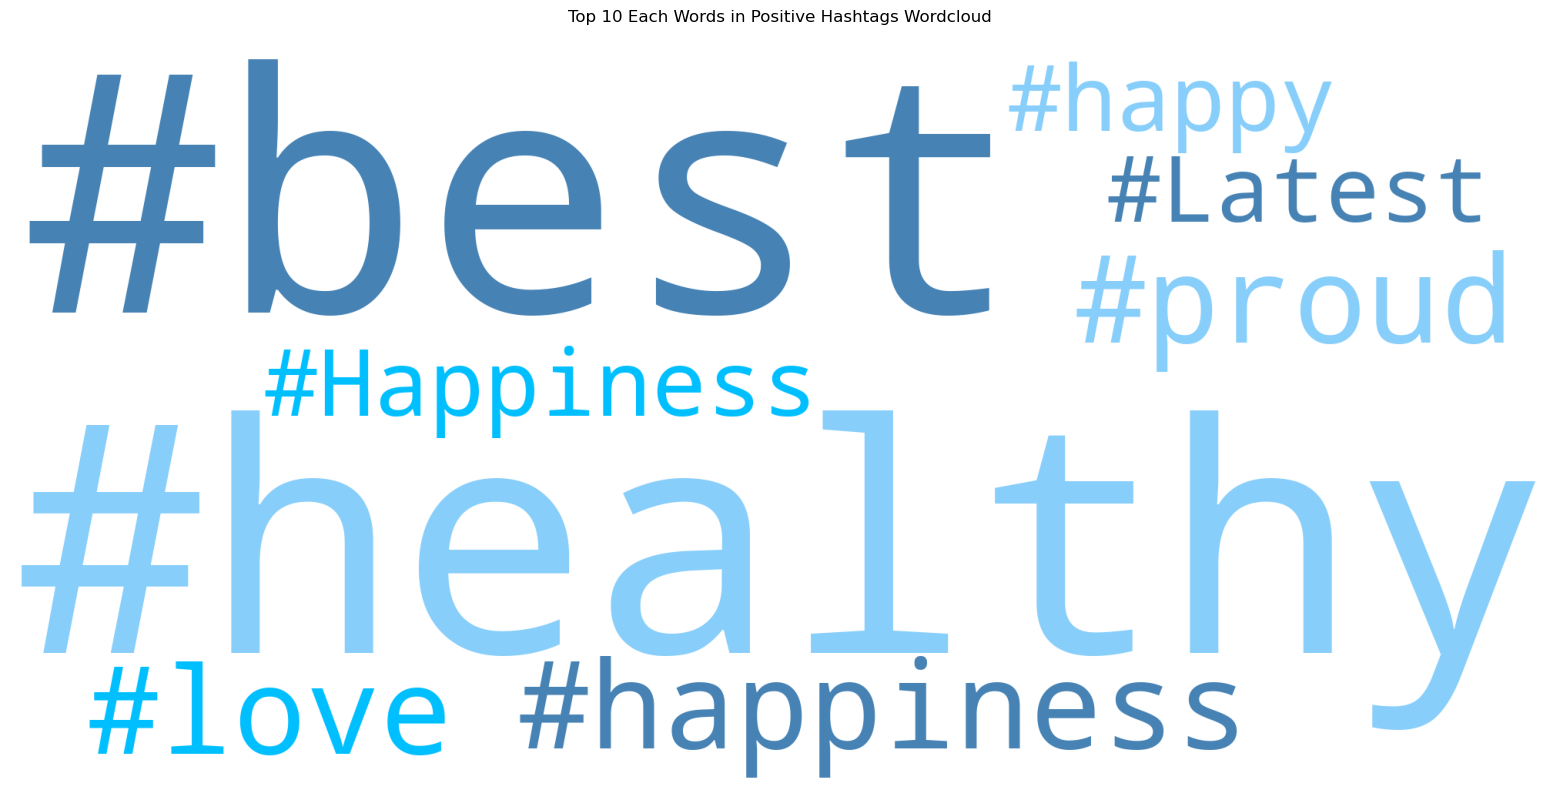

In [118]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import numpy as np

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#87CEFA", "#00BFFF", "#4682B4"]
    return np.random.choice(colors)

# Filter the hashtags with a positive sentiment category
positive_hashtags = hashtags_df[hashtags_df['sentiment_category'] == 'Positive']['hashtag']

# Join the positive hashtags into a single string
words = ' '.join([hashtag for hashtag in positive_hashtags])

# Get the frequency of each word
word_frequencies = {}
for word in words.split():
    word_frequencies[word] = word_frequencies.get(word, 0) + 1

# Get the top 10 words by frequency
top_words = dict(sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:10])

# Generate a word cloud from the top 10 words
wordCloud = WordCloud(background_color='white', mode="RGB", width=2000, height=1000, color_func=color_func).generate_from_frequencies(top_words)

# Display the word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordCloud)
plt.title("Top 10 Each Words in Positive Hashtags Wordcloud")
plt.axis("off")
plt.show()


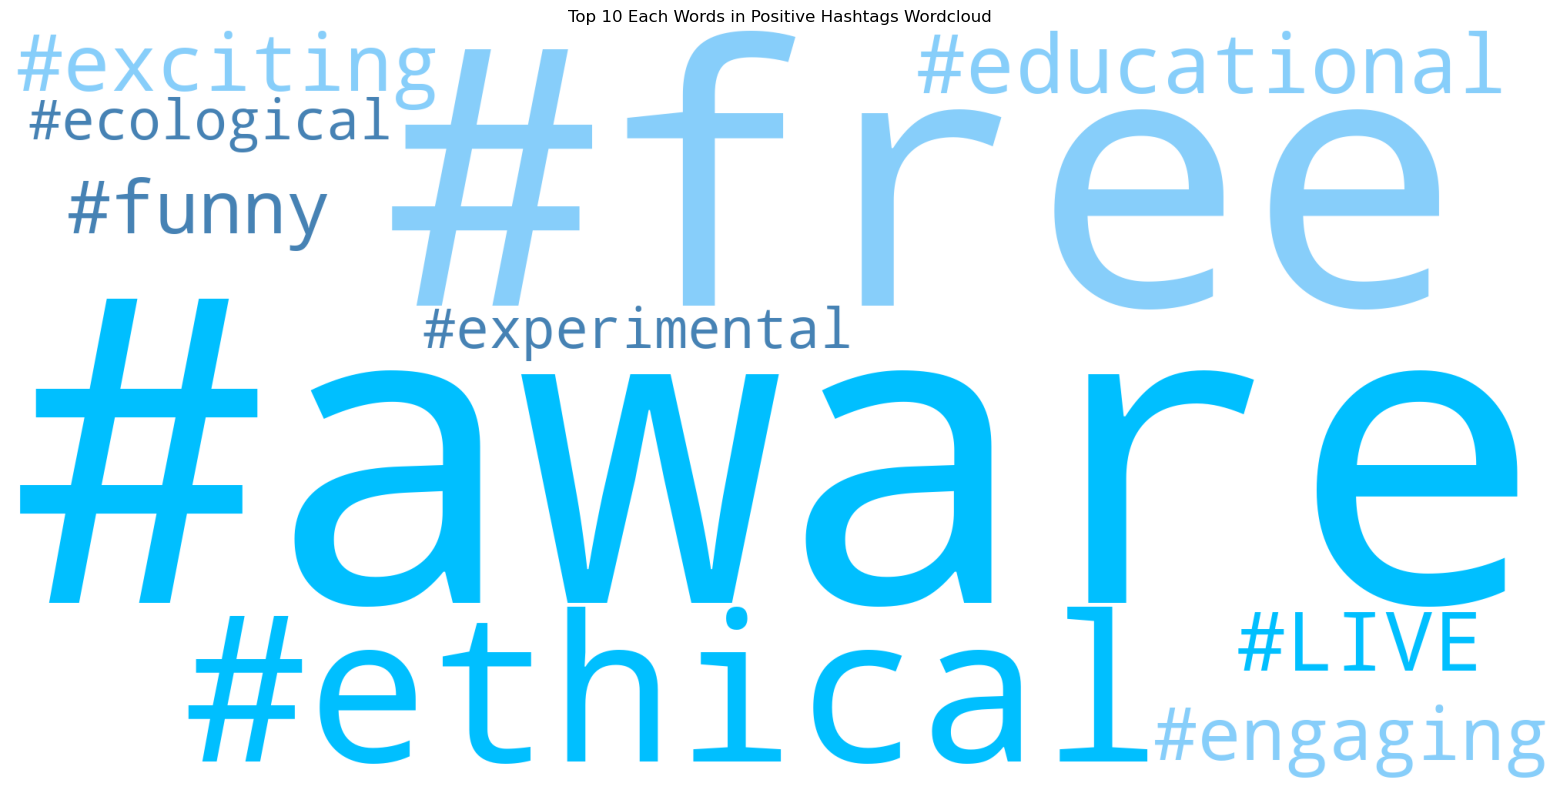

In [119]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import numpy as np

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#87CEFA", "#00BFFF", "#4682B4"]
    return np.random.choice(colors)

# Filter the hashtags with a positive sentiment category
positive_hashtags = hashtags_df[hashtags_df['sentiment_category'] == 'Partially Positive']['hashtag']

# Join the positive hashtags into a single string
words = ' '.join([hashtag for hashtag in positive_hashtags])

# Get the frequency of each word
word_frequencies = {}
for word in words.split():
    word_frequencies[word] = word_frequencies.get(word, 0) + 1

# Get the top 10 words by frequency
top_words = dict(sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:10])

# Generate a word cloud from the top 10 words
wordCloud = WordCloud(background_color='white', mode="RGB", width=2000, height=1000, color_func=color_func).generate_from_frequencies(top_words)

# Display the word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordCloud)
plt.title("Top 10 Each Words in Positive Hashtags Wordcloud")
plt.axis("off")
plt.show()


In [120]:
df = df[df.sentiment_textblob != 2]

In [121]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes  import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [122]:
# splitting
X_train = df["clean_text"]
y_train = df["sentiment_textblob"]

X_test = df["clean_text"]
y_test = df["sentiment_textblob"]

In [123]:
%%time
# BAG OF WORDS

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(stop_words='english')
# bag-of-words feature matrix
train_bow = bow_vectorizer.fit_transform(X_train)
print("Vocabulary Size of Bag of Words: ",len(bow_vectorizer.get_feature_names()))

#TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
# TF-IDF feature matrix
train_tfidf = tfidf_vectorizer.fit_transform(X_train)
print("Vocabulary Size of TF-IDF:",len(tfidf_vectorizer.get_feature_names()))

#N-Grams
# Fit the CountVectorizer to the training data specifiying a minimum
n_grams_vectorizer = CountVectorizer(ngram_range=(1,3))
train_n_grams = n_grams_vectorizer.fit_transform(X_train)
print("Vocabulary Size of N-Grams:",len(n_grams_vectorizer.get_feature_names()))

Vocabulary Size of Bag of Words:  8707
Vocabulary Size of TF-IDF: 8707
Vocabulary Size of N-Grams: 68494
Wall time: 399 ms


In [124]:
%%time
train_bow = bow_vectorizer.transform(X_train)
train_tfidf = tfidf_vectorizer.transform(X_train)
train_n_grams = n_grams_vectorizer.transform(X_train)

Wall time: 273 ms


In [125]:
%%time
test_bow = bow_vectorizer.transform(X_test)
test_tfidf = tfidf_vectorizer.transform(X_test)
test_n_grams = n_grams_vectorizer.transform(X_test)

Wall time: 268 ms


# Naive Bayes Model

In [154]:
from sklearn.metrics import f1_score

#Bag of Words
mul_bow = MultinomialNB()
mul_bow.fit(train_bow,y_train)

prediction_bow = mul_bow.predict(test_bow)
print("F1 Score for Bag-of-Words:",f1_score(y_test,prediction_bow, average='weighted'))

#TF-IDF
mul_tfidf = MultinomialNB()
mul_tfidf.fit(train_tfidf,y_train)

prediction_tfidf = mul_tfidf.predict(test_tfidf)
print("F1 Score for TF-IDF:",f1_score(y_test,prediction_tfidf, average='weighted'))

#N-grams
mul_n_grams = MultinomialNB()
mul_n_grams.fit(train_n_grams,y_train)

nb_prediction_n_grams = mul_n_grams.predict(test_n_grams)
print("F1 Score for N-Grams:",f1_score(y_test,prediction_n_grams, average='weighted'))

F1 Score for Bag-of-Words: 0.9518365501701694
F1 Score for TF-IDF: 0.9065272409954552
F1 Score for N-Grams: 0.9945874715833745


In [158]:
from sklearn.metrics import accuracy_score
accuracy_nb = accuracy_score(y_test, nb_prediction_n_grams)
print("Accuracy for Naive Bayes model: ", accuracy_nb)

Accuracy for Naive Bayes model:  0.9945068067828995


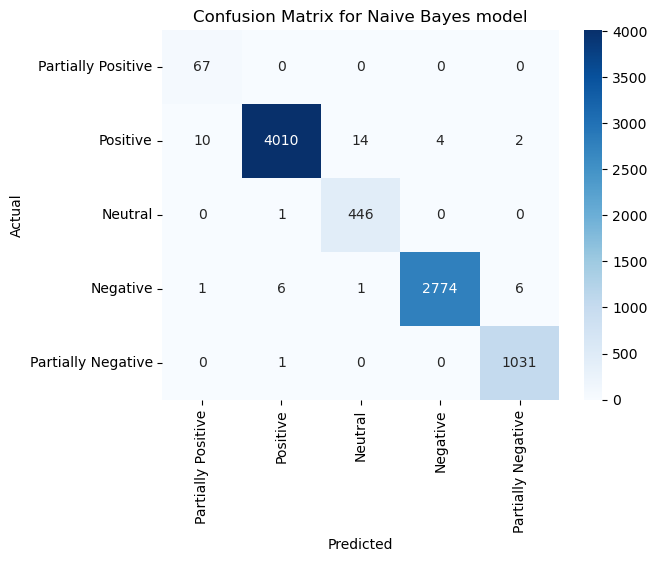

In [169]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix for Naive Bayes model
cm_nb = confusion_matrix(y_test, nb_prediction_n_grams)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm_nb, annot=True, cmap="Blues", fmt="d", xticklabels=['Partially Positive', 'Positive', 'Neutral', 'Negative', 'Partially Negative'], yticklabels=['Partially Positive', 'Positive', 'Neutral', 'Negative', 'Partially Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes model')
plt.show()


# Logistic Regression Model

In [159]:
from sklearn.metrics import f1_score



#Using Logistic regression

#Bag of Words
lreg_bow = LogisticRegression(solver="liblinear")
lreg_bow.fit(train_bow,y_train)

prediction_bow = lreg_bow.predict(test_bow)
print("F1 Score for Bag-of-Words:",f1_score(y_test,prediction_bow, average='weighted'))

#TF-IDF
lreg_tfidf = LogisticRegression()
lreg_tfidf.fit(train_tfidf,y_train)

prediction_tfidf = lreg_tfidf.predict(test_tfidf)
print("F1 Score for TF-IDF:",f1_score(y_test,prediction_tfidf, average='weighted'))

#N-grams
lreg_n_grams = LogisticRegression(solver="liblinear")
lreg_n_grams.fit(train_n_grams,y_train)

lr_prediction_n_grams = lreg_n_grams.predict(test_n_grams)
print("F1 Score for N-Grams:",f1_score(y_test,prediction_n_grams, average='weighted'))


F1 Score for Bag-of-Words: 0.996894586655767
F1 Score for TF-IDF: 0.9596681521890965
F1 Score for N-Grams: 0.9945874715833745


In [165]:
from sklearn.metrics import accuracy_score
accuracy_lr = accuracy_score(y_test, lr_prediction_n_grams)
print("Accuracy for Logistic Regression model: ", accuracy_lr)

Accuracy for Logistic Regression model:  1.0


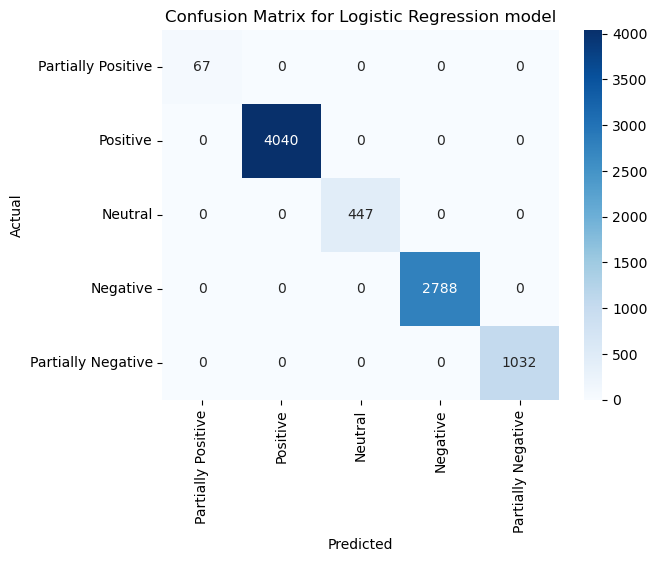

In [170]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix for Naive Bayes model
cm_nb = confusion_matrix(y_test, lr_prediction_n_grams)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm_nb, annot=True, cmap="Blues", fmt="d", xticklabels=['Partially Positive', 'Positive', 'Neutral', 'Negative', 'Partially Negative'], yticklabels=['Partially Positive', 'Positive', 'Neutral', 'Negative', 'Partially Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression model')
plt.show()


# Support Vector Machine Model

In [161]:


#Bag of Words
svm_bow = SVC()
svm_bow.fit(train_bow,y_train)

prediction_bow = svm_bow.predict(test_bow)
print("F1 Score for Bag-of-Words:",f1_score(y_test,prediction_bow, average='weighted'))

#TF-IDF
svm_tfidf = SVC()
svm_tfidf.fit(train_tfidf,y_train)

prediction_tfidf = svm_tfidf.predict(test_tfidf)
print("F1 Score for TF-IDF:",f1_score(y_test,prediction_tfidf, average='weighted'))

#N-grams
svm_n_grams = SVC()
svm_n_grams.fit(train_n_grams,y_train)

svm_prediction_n_grams = svm_n_grams.predict(test_n_grams)
print("F1 Score for N-Grams:",f1_score(y_test,prediction_n_grams, average='weighted'))

F1 Score for Bag-of-Words: 0.9920742606114739
F1 Score for TF-IDF: 0.9948231765829492
F1 Score for N-Grams: 0.9945874715833745


In [163]:
from sklearn.metrics import accuracy_score
accuracy_svm = accuracy_score(y_test, svm_prediction_n_grams)
print("Accuracy for Suppport Vector Machine model: ", accuracy_svm)

Accuracy for Suppport Vector Machine model:  0.9946262240267495


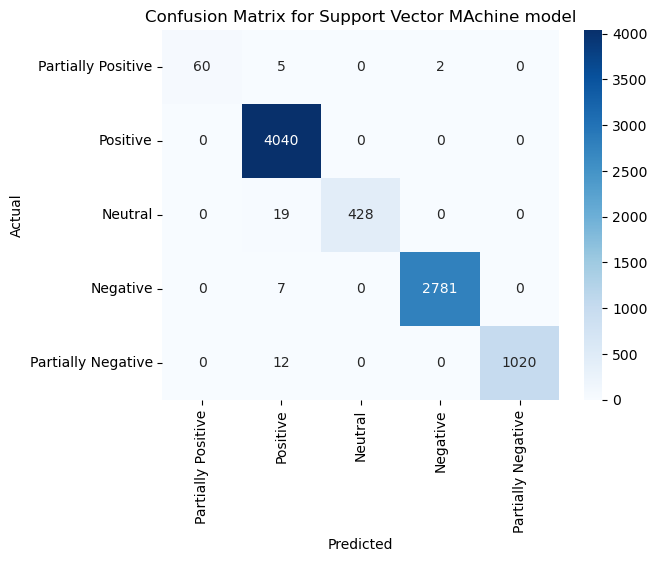

In [172]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix for Naive Bayes model
cm_nb = confusion_matrix(y_test, svm_prediction_n_grams)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm_nb, annot=True, cmap="Blues", fmt="d", xticklabels=['Partially Positive', 'Positive', 'Neutral', 'Negative', 'Partially Negative'], yticklabels=['Partially Positive', 'Positive', 'Neutral', 'Negative', 'Partially Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Support Vector MAchine model')
plt.show()


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the predicted labels for the test data
y_pred = clf.predict(X_test)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

# Fine Tuning Naive Bayes

In [136]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}
nb = MultinomialNB()
clf_nb = GridSearchCV(nb, parameters, cv=5)
clf_nb.fit(train_n_grams, y_train)

print("Best parameters: ", clf_nb.best_params_)
print("Best F1 Score: ", clf_nb.best_score_)


Best parameters:  {'alpha': 5.0}
Best F1 Score:  0.883681520711853


# Fine Tuning  Logistic Regression

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for GridSearchCV
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10],
              'solver': ['newton-cg', 'lbfgs', 'sag', 'liblinear']}

# Create the logistic regression model
logreg = LogisticRegression()

# Instantiate the GridSearchCV object
clf = GridSearchCV(logreg, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
clf.fit(train_n_grams, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", clf.best_params_)
print("Best score: ", clf.best_score_)

Best hyperparameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best score:  0.936468196651153


# Fine Tuning Support Vector Machine

In [140]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Initialize the SVM model
svm = SVC()

# Set the parameters to be tuned
parameters = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'sigmoid']}

# Initialize the GridSearchCV object
clf_svm = GridSearchCV(svm, parameters, cv=3, n_jobs=-1)

# Fit the model to the training data
clf_svm.fit(train_n_grams, y_train)

# Make predictions on the test data using the trained model
y_pred = clf_svm.predict(test_n_grams)

# Print the best parameters and the F1 score on the test data
print('Best parameters:', clf_svm.best_params_)
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))


Best parameters: {'C': 10, 'kernel': 'sigmoid'}
F1 Score: 0.9998805612022978
Wall time: 31.1 s
